In [109]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [90]:
df.shape

(284807, 31)

In [91]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Our Dataset doesn't have any Null values

In [93]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [20]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

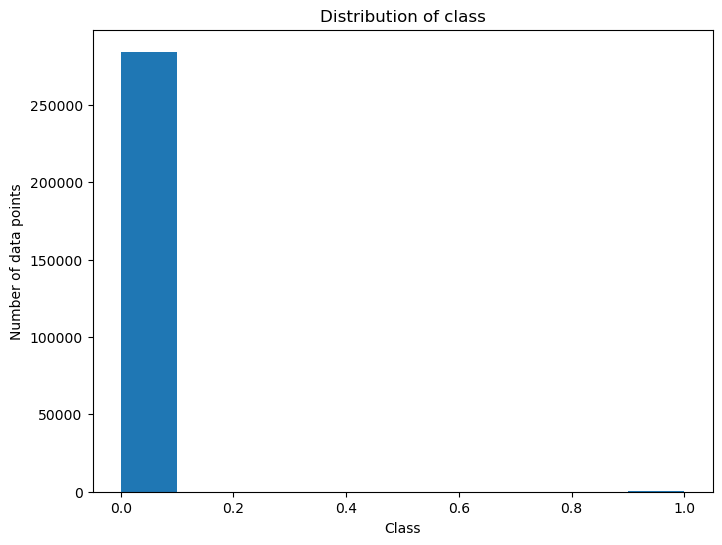

In [104]:
df['Class'].plot.hist(figsize = (8,6))
plt.title("Distribution of class")
plt.xlabel("Class")
plt.ylabel("Number of data points")
plt.show()

This data set is very unbalanced as it has more than 99% data from a single class
- 0 --> Normal transaction
- 1 --> Fraudulent transaction 

In [21]:
# separating the classes for analysis

legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

In [74]:
# Data points in each DataFrame
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [26]:
# statistical measures for these two classes
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [27]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [28]:
# comapring the values of these two classes
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Under sampling
- Creating a sample dataset with same data points as fraud class

In [32]:
legit_sample = legit.sample(492)

Joining the two DataFrames legit sample and fraud data 

In [35]:
CreditCard = pd.concat([legit_sample, fraud], axis = 0)

In [36]:
CreditCard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
206005,136020.0,-0.084888,0.981472,2.072519,2.916979,0.004110,0.584485,0.083914,0.316552,-0.785903,...,0.097623,0.280775,0.096336,-0.082555,-0.787663,-0.255093,0.107686,0.074144,11.76,0
93806,64594.0,-9.509050,-12.478089,-3.576242,3.050835,-10.103418,6.262655,12.163402,-0.125012,-1.762800,...,2.821307,0.377708,9.129594,-0.673849,1.799572,0.408445,-1.145939,-0.025045,4002.00,0
110858,72002.0,1.171398,0.673121,-0.240413,1.379748,0.097011,-0.964592,0.229359,-0.117772,-0.090409,...,-0.020714,0.037976,-0.051706,0.262015,0.568906,-0.317296,0.051011,0.057015,1.00,0
38381,39374.0,-1.084659,1.875061,0.350536,3.167242,-0.391817,0.627411,-0.557509,1.254159,-1.153587,...,0.046381,0.290584,0.009724,-0.064580,-0.225990,0.279869,0.234683,0.045528,13.65,0
28655,35099.0,1.113578,-0.276012,1.096900,0.622822,-0.688393,0.680973,-0.809339,0.379468,0.689714,...,-0.032510,0.094663,0.005847,-0.259553,0.194409,0.348733,0.028626,0.010861,11.50,0


### Statistical comapriosn of data points
It's clear that mean Amount and time is very similar in the our main dataset and small dataset that we spearated for analysi so we can work with this

In [39]:
CreditCard.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,90631.189024,0.021715,-0.018197,0.174424,-0.001097,-0.029714,0.033588,0.022940,0.051362,-0.039064,...,-0.020217,0.028253,-0.000476,-0.008515,0.030765,0.020548,-0.022925,-0.015545,-0.026671,87.865447
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [47]:
CreditCard.Class.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

### Splitting the Data into Features and Target

In [52]:
X = CreditCard.drop(['Class'], axis = 1)
Y = CreditCard['Class']

Splitting the data into training data an testing data

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 2, stratify =Y, test_size = 0.2)

### Model Training
Fitting and training the data usning Logistic Regression

In [75]:
# extracting model
logR = LogisticRegression()

In [76]:
# Fitting our training data on the logistic regression model
logR.fit(X_train, Y_train)

LogisticRegression()

### Model evaluation
- Predicting the target value from training set
- Accuracy score for the training set

In [66]:
predictedValues = logR.predict(X_train)
accuracyScore = accuracy_score(predictedValues, Y_train)

In [77]:
# Accuracy score of the training data
accuracyScore

0.9466327827191868

In [88]:
# Accuracy of our model for the training data
acc = round(accuracyScore*100,2)
print("Accuracy of our model on Training data : ", acc, "%")

Accuracy of our model on Training data :  94.66 %


### Prediction of model on Test data
- Prediction of test data
- Accuracy of test data

In [72]:
test_prediction = logR.predict(X_test)
accuracy = accuracy_score(test_prediction, Y_test)

In [87]:
acc = round(accuracy*100, 2)
print("Accuracy of the model on Test data : ", acc, "%")

Accuracy of the model on Test data :  94.42 %


### RMSE
- calculating root mean sqaure error

In [113]:
# calculating Root mean squared error for training data
mean_squared_error(Y_train, predictedValues, squared = False)

0.2310134569258103

In [115]:
# calculating Root mean squared error for test data
mean_squared_error(Y_test, test_prediction, squared = False)

0.23629973222959152